<a href="https://colab.research.google.com/github/lucaschini/cripto-fraud-analysis/blob/main/Crypto_EBAC_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados em Criptomoedas: Detecção de fraudes

---



**Professora:** Profa. Dra. Isadora Garcia Ferrão

**Descrição dos Dados:** Os dados foram coletados de fontes públicas de monitoramento de carteiras e transações na rede Ethereum, como Etherscan, Dune Analytics e outras plataformas abertas. São dados reais e anonimizados, amplamente utilizados em estudos de detecção de fraude e análise de comportamento no mercado de criptomoedas. Cada linha representa uma carteira e suas métricas de atividade.

**Objetivo:** Construir um modelo preditivo capaz de identificar, com base nas métricas de transações, quando uma carteira apresenta comportamento anômalo, caracterizando uma potencial fraude.



## **Análise exploratória**

In [3]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Configuração básica dos gráficos
plt.style.use('default')

In [5]:
# --- 1. Carregamento e limpeza dos dados ---
df = pd.read_csv('/content/ethereum_transactions.csv')

In [6]:
# Remover espaços em branco dos nomes das colunas
df.columns = df.columns.str.strip()
df

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Cria a coluna 'is_fraud' de forma direta:
# 1 se 'Sent tnx' for maior que (média + 2 * desvio padrão), senão 0
df["is_fraud"] = (df["Sent tnx"] > (df["Sent tnx"].mean() + 2 * df["Sent tnx"].std())).astype(int)
df["is_fraud"]

,is_fraud
0,0
1,0
2,0
3,0
4,1
...,...
9836,0
9837,0
9838,0
9839,0


In [8]:
# Exibir informações iniciais para diagnóstico
# print("Colunas do Data Frame: ", df.columns.tolist()) prefiro .info()
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

## **Visualizando Correlações e Distribuições**

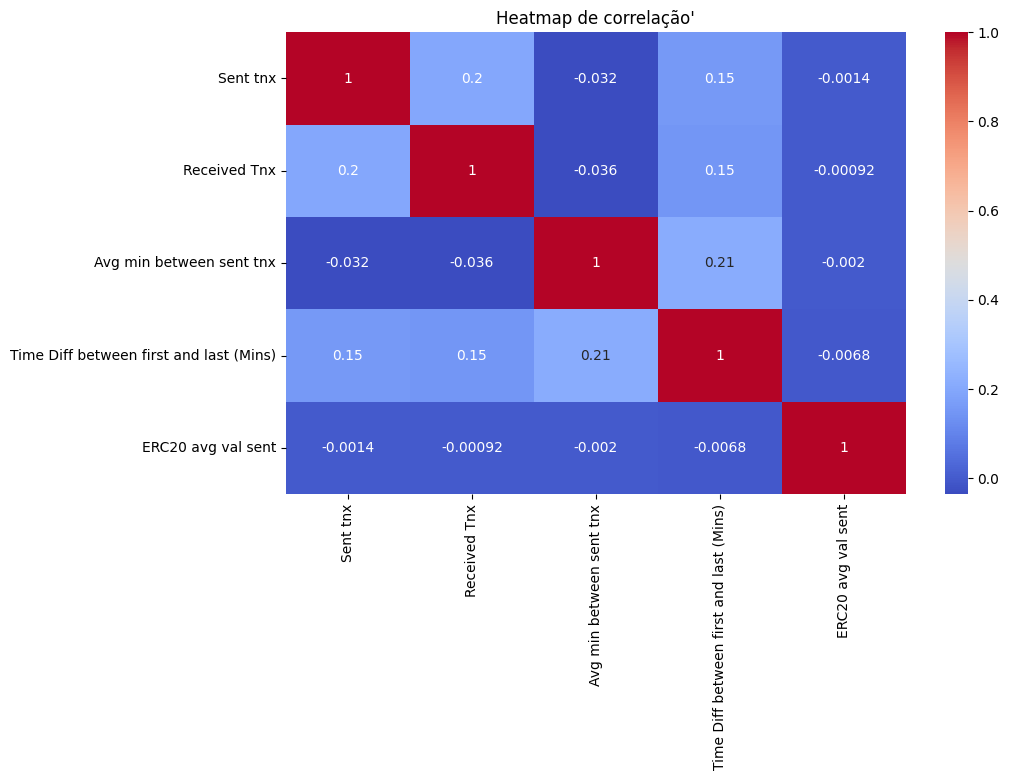

In [9]:
# Defina as colunas relevantes para a correlação
cols_for_corr = [
    "Sent tnx",
    "Received Tnx",
    "Avg min between sent tnx",
    "Time Diff between first and last (Mins)",
    "ERC20 avg val sent"
]

corr_matrix = df[cols_for_corr].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap de correlação'")
plt.show()


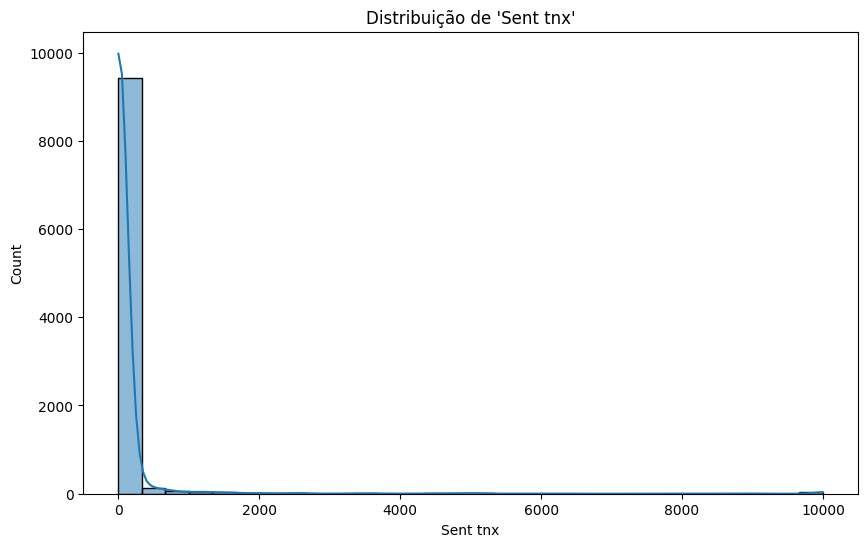

In [10]:
# Histogramas para visualizar a distribuição de 'Sent tnx'
plt.figure(figsize=(10, 6))
sns.histplot(df["Sent tnx"], bins=30, kde=True)
plt.xlabel("Sent tnx")
plt.title("Distribuição de 'Sent tnx'")
plt.show()



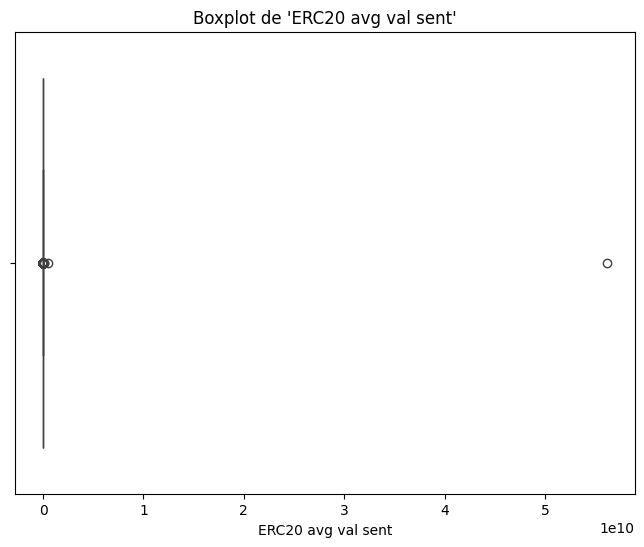

In [11]:
# Boxplot para identificar outliers em 'ERC20 avg val sent'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["ERC20 avg val sent"])
plt.xlabel("ERC20 avg val sent")
plt.title("Boxplot de 'ERC20 avg val sent'")
plt.show()


## **BASELINE**

In [12]:
# Calcular média e desvio padrão para 'Sent tnx'
mean_sent = df['Sent tnx'].mean()
std_sent = df['Sent tnx'].std()

threshold = mean_sent + 3 * std_sent
print(mean_sent, std_sent, threshold)

115.93171425668123 757.2263606018076 2387.610796062104


In [13]:
# Marcar como anomalia as transações com 'Sent tnx' acima do threshold
df['baseline_anomaly'] = df['Sent tnx'].apply(lambda x: 1 if x > threshold else 0)

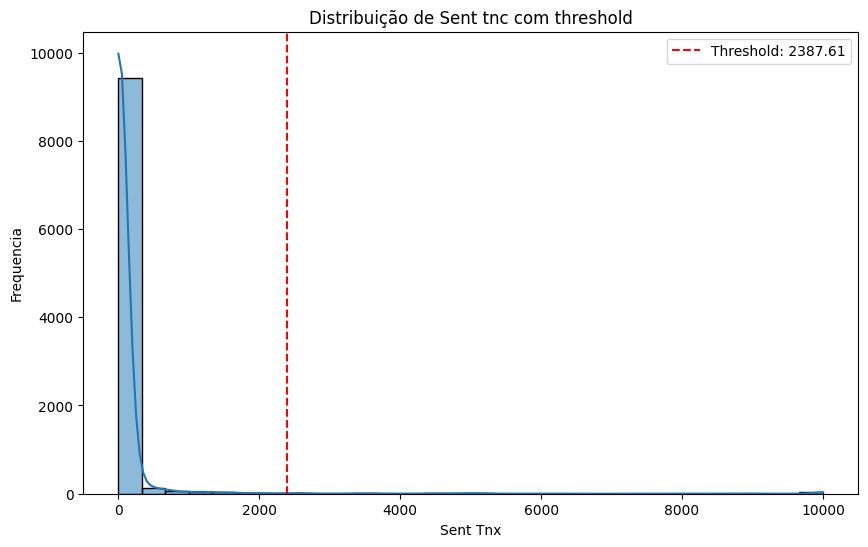

In [14]:
# Exibir histograma com o threshold
plt.figure(figsize=(10,6))
sns.histplot(df["Sent tnx"], bins=30, kde=True)

plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.xlabel("Sent Tnx")
plt.ylabel("Frequencia")
plt.title("Distribuição de Sent tnc com threshold")
plt.legend()
plt.show()


In [15]:
print('Número de anomalias (baseline):', df['baseline_anomaly'].sum())

Número de anomalias (baseline): 116


In [16]:
# Método Baseline:
print(classification_report(df['is_fraud'], df['baseline_anomaly']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9697
           1       1.00      0.81      0.89       144

    accuracy                           1.00      9841
   macro avg       1.00      0.90      0.95      9841
weighted avg       1.00      1.00      1.00      9841



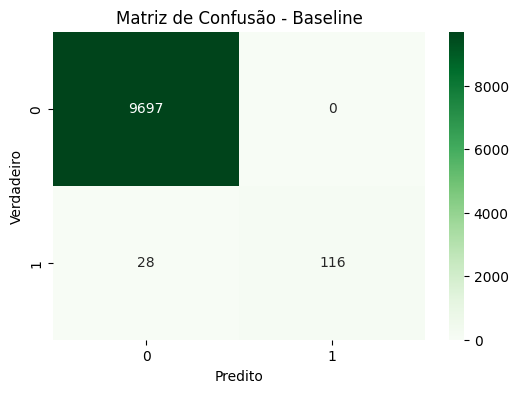

In [17]:
#Plotar Matriz de Confusão
cm_baseline = confusion_matrix(df['is_fraud'], df['baseline_anomaly'])
plt.figure(figsize=(6,4))
sns.heatmap(cm_baseline, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão - Baseline")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

## **AULA 2 :)**

In [24]:
#Define as features utilizadas nos modelos
features = ["Sent tnx", "Received Tnx", "Avg min between sent tnx", "Time Diff between first and last (Mins)", "ERC20 avg val sent"]

print("\Contagem de NANs nas features: ")
print(df[features].isna().sum())

df_ml = df.dropna(subset=features).copy()

if "is_fraud" not in df_ml.columns:
  df_ml["is_fraud"] = df["is_fraud"]

\Contagem de NANs nas features: 
Sent tnx                                     0
Received Tnx                                 0
Avg min between sent tnx                     0
Time Diff between first and last (Mins)      0
ERC20 avg val sent                         829
dtype: int64


Número de anomalias identificadas pelo Isolation Forest:  451


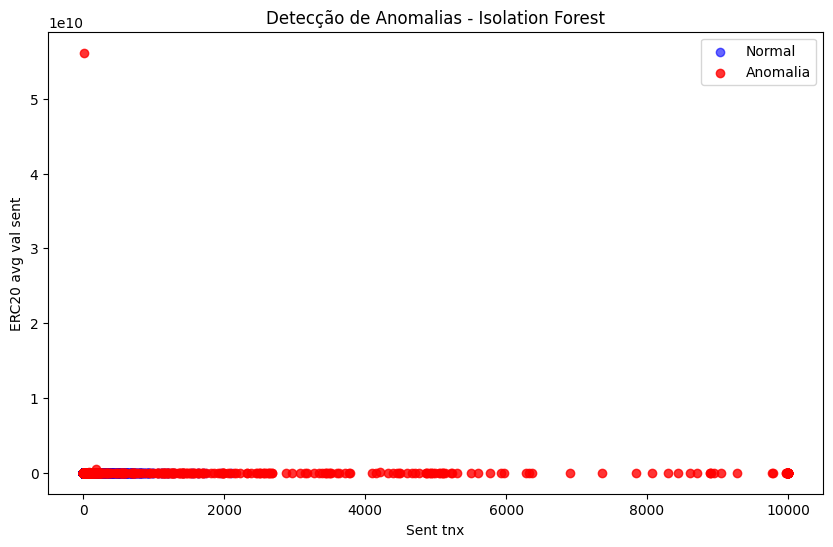

In [27]:
# Criação e treinamento do modelo de Isolation Forest
from sklearn.ensemble import IsolationForest

if_model = IsolationForest(contamination=0.05, random_state=42)
df_ml['if_anomaly'] = if_model.fit_predict(df_ml[features])
df_ml['if_anomaly_flag'] = df_ml['if_anomaly'].apply(lambda x: 1 if x == -1 else 0)

print("Número de anomalias identificadas pelo Isolation Forest: ", df_ml['if_anomaly_flag'].sum())

#Visualização: Scatter plot comparando duas features com anomalias

plt.figure(figsize=(10,6))
normal = df_ml[df_ml['if_anomaly_flag'] == 0]
anomaly = df_ml[df_ml['if_anomaly_flag'] == 1]
plt.scatter(normal['Sent tnx'], normal['ERC20 avg val sent'], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomaly['Sent tnx'], anomaly['ERC20 avg val sent'], c='red', label='Anomalia', alpha=0.8)
plt.xlabel('Sent tnx')
plt.ylabel('ERC20 avg val sent')
plt.title('Detecção de Anomalias - Isolation Forest')
plt.legend()
plt.show()

In [28]:
#classification report
print("Classification Report - Isolation Forest: ")
print(classification_report(df_ml['is_fraud'], df_ml['if_anomaly_flag']))


Classification Report - Isolation Forest: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8868
           1       0.31      0.97      0.47       144

    accuracy                           0.97      9012
   macro avg       0.65      0.97      0.73      9012
weighted avg       0.99      0.97      0.97      9012



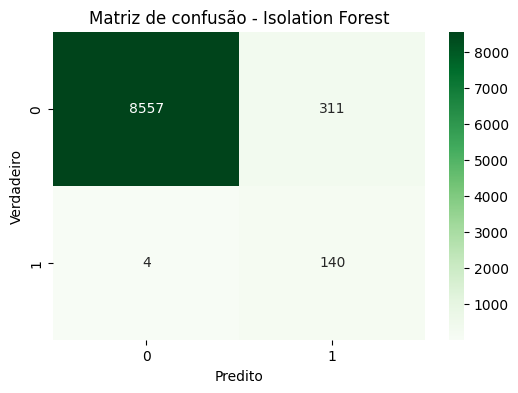

In [37]:
# Calcula a matriz de confusão entre os rótulos reais ('is_fraud')
cn_if = confusion_matrix(df_ml['is_fraud'], df_ml['if_anomaly_flag'])

plt.figure(figsize=(6,4))
sns.heatmap(cn_if, annot=True, fmt="d", cmap='Greens')
plt.title("Matriz de confusão - Isolation Forest")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

Número de anomalias identificadas pelo DBSCAN:  6246


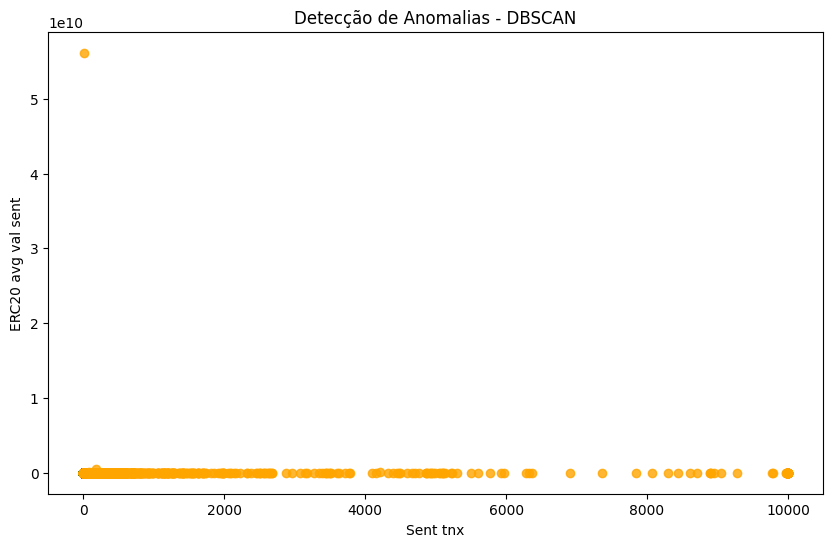

In [47]:
#DBSCAN
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=3, min_samples=5)
df_ml['dbscan_labels'] = dbscan_model.fit_predict(df_ml[features])
df_ml['dbscan_anomaly'] = df_ml['dbscan_labels'].apply(lambda x: 1 if x == -1 else 0)

print("Número de anomalias identificadas pelo DBSCAN: ", df_ml['dbscan_anomaly'].sum())
#Visualização: Scatter plot
plt.figure(figsize=(10,6))
normal_db = df_ml[df_ml['dbscan_anomaly'] == 0]
anomaly_db = df_ml[df_ml['dbscan_anomaly'] == 1]
plt.scatter(normal_db['Sent tnx'], normal_db['ERC20 avg val sent'], c='green', label='Normal', alpha=0.6)
plt.scatter(anomaly_db['Sent tnx'], anomaly_db['ERC20 avg val sent'], c='orange', label='Anomalia', alpha=0.8)
plt.xlabel("Sent tnx")
plt.ylabel("ERC20 avg val sent")
plt.title("Detecção de Anomalias - DBSCAN")
plt.show()

In [48]:
#classification report
print("Classification Report - DBSCAN: ")
print(classification_report(df_ml['is_fraud'], df_ml['dbscan_anomaly']))

Classification Report - DBSCAN: 
              precision    recall  f1-score   support

           0       1.00      0.31      0.48      8868
           1       0.02      1.00      0.05       144

    accuracy                           0.32      9012
   macro avg       0.51      0.66      0.26      9012
weighted avg       0.98      0.32      0.47      9012



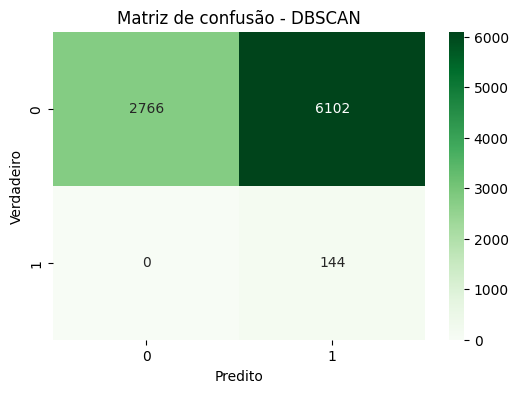

In [49]:
# Avaliação do DBSCAN com matriz de confusão
cm_db = confusion_matrix(df_ml['is_fraud'], df_ml['dbscan_anomaly'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_db, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de confusão - DBSCAN')
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

In [50]:
methods = {
    'Baseline (Threshold)': df_ml['baseline_anomaly'].sum(),
    'Isolation Forest': df_ml['if_anomaly_flag'].sum(),
    'DBSCAN': df_ml['dbscan_anomaly'].sum()
}

comparative_df = pd.DataFrame(list(methods.items()), columns=['Método', 'Número de anomalias'])
print(comparative_df)

                 Método  Número de anomalias
0  Baseline (Threshold)                  116
1      Isolation Forest                  451
2                DBSCAN                 6246
